In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [115]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.07,NaN,C


In [86]:
train_df.drop(['Ticket', 'Name', 'PassengerId', 'Cabin'], axis = 1, inplace = True)
test_df.drop(['Ticket', 'Name', 'PassengerId', 'Cabin'], axis = 1, inplace = True)

In [87]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.25,S
1,1,1,female,38.00,1,0,71.28,C
2,1,3,female,26.00,0,0,7.92,S
3,1,1,female,35.00,1,0,53.10,S
4,0,3,male,35.00,0,0,8.05,S
5,0,3,male,NaN,0,0,8.46,Q
6,0,1,male,54.00,0,0,51.86,S
7,0,3,male,2.00,3,1,21.07,S
8,1,3,female,27.00,0,2,11.13,S
9,1,2,female,14.00,1,0,30.07,C


# remove outlier age >= 65

In [88]:


train_df = train_df[train_df['Age'] <= 65]
train_df.shape

(706, 8)

In [89]:
def label_encoding(data_frame):
    encoders = {}
    for column in data_frame.columns:
        if data_frame[column].dtype == "object":
            encoders[column] = LabelEncoder()
            data_frame[column] = encoders[column].fit_transform(data_frame[column])

df = pd.concat([train_df, test_df], axis = 0)

In [90]:
label_encoding(df)

In [91]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.00,3,1,22.00,1,0,7.25,2
1,1.00,1,0,38.00,1,0,71.28,0
2,1.00,3,0,26.00,0,0,7.92,2
3,1.00,1,0,35.00,1,0,53.10,2
4,0.00,3,1,35.00,0,0,8.05,2


In [92]:

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df.isnull().sum()


Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [93]:
df = df.astype('float64')

In [94]:
df.shape

(1124, 8)

In [95]:
X = df.drop(['Survived'], axis = 1).to_numpy()[:706]
y = df["Survived"][:706]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [96]:
from lazypredict.Supervised import LazyClassifier

In [97]:
model = LazyClassifier()
model.fit(X_train,X_test,  y_train, y_test)

# print('Traning accuracy : {}'.format(model.score(X_train, y_train)))
# print('Test accuracy    : {}'.format(model.score(X_test, y_test)))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 43.42it/s]

[LightGBM] [Info] Number of positive: 230, number of negative: 334
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 190
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.407801 -> initscore=-0.373062
[LightGBM] [Info] Start training from score -0.373062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 QuadraticDiscriminantAnalysis      0.83               0.81     0.81      0.83   
 KNeighborsClassifier               0.82               0.80     0.80      0.82   
 RandomForestClassifier             0.82               0.80     0.80      0.82   
 SVC                                0.82               0.80     0.80      0.82   
 XGBClassifier                      0.80               0.80     0.80      0.80   
 ExtraTreesClassifier               0.80               0.79     0.79      0.80   
 NuSVC                              0.80               0.79     0.79      0.80   
 ExtraTreeClassifier                0.80               0.79     0.79      0.80   
 AdaBoostClassifier                 0.79               0.79     0.79      0.79   
 LGBMClassifier                     0.80               0.79     0.79      0.79   
 LabelPropagatio

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
model = LogisticRegression()
model.fit(X_train, y_train)
print('Traning accuracy : {}'.format(model.score(X_train, y_train)))
print('Test accuracy    : {}'.format(model.score(X_test, y_test)))





Traning accuracy : 0.8067375886524822
Test accuracy    : 0.7394366197183099


In [136]:
from sklearn.ensemble import GradientBoostingClassifier



p1 = Pipeline([
    ('regressor', GradientBoostingClassifier(learning_rate = 0.1, max_depth = 2))
])

p1.fit(X_train, y_train)
print("Traning set score : {}".format(p1.score(X_train, y_train)))
print("Test set score    : {}".format(p1.score(X_test, y_test)))


Traning set score : 0.8546099290780141
Test set score    : 0.8098591549295775


# kneighbors

In [160]:
from sklearn.neighbors import KNeighborsClassifier

p1 = KNeighborsClassifier(n_neighbors = 3)
p1.fit(X_train, y_train)
print("Traning set score : {}".format(p1.score(X_train, y_train)))
print("Test set score    : {}".format(p1.score(X_test, y_test)))

Traning set score : 0.8280141843971631
Test set score    : 0.6690140845070423


In [131]:
prediction = np.array(p1.predict(df.drop(['Survived'], axis = 1).to_numpy()[706:]))

In [132]:
dict = {
    "PassengerId": test_df['PassengerId'].to_numpy(),
    "Survived": prediction.astype('int64')
}

sub_df = pd.DataFrame(dict)
sub_df.to_csv('submission8.csv', index = False)

In [49]:
from xgboost import XGBClassifier


# model = XGBRegressor()

p1 = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', XGBClassifier(learning_rate = 0.01, max_depth = 3))
])

p1.fit(X_train, y_train)
print("Traning set score : {}".format(p1.score(X_train, y_train)))
print("Test set score    : {}".format(p1.score(X_test, y_test)))

Traning set score : 0.8384831460674157
Test set score    : 0.8044692737430168


In [22]:
from lightgbm import LGBMClassifier


p1 = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LGBMClassifier(max_depth = 3))
])

p1.fit(X_train, y_train)
print("Traning set score : {}".format(p1.score(X_train, y_train)))
print("Test set score    : {}".format(p1.score(X_test, y_test)))

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [23]:
prediction = np.array(model.predict(df.drop(['Survived'], axis = 1).to_numpy()[891:]))

In [134]:
dict = {
    "PassengerId": test_df['PassengerId'].to_numpy(),
    "Survived": prediction.astype('int64')
}

sub_df = pd.DataFrame(dict)
sub_df.to_csv('submission5.csv', index = False)

<Axes: ylabel='Age'>

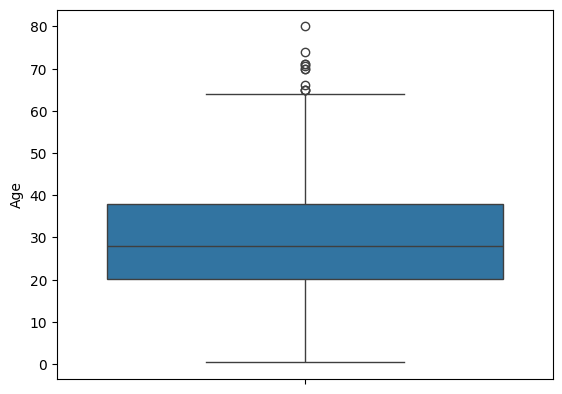

In [52]:
sns.boxplot(train_df['Age'])

<Axes: ylabel='Age'>

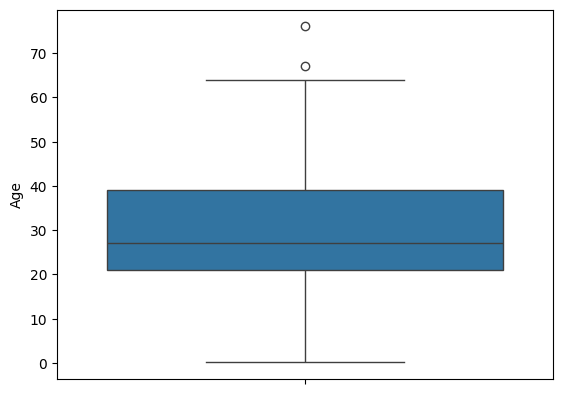

In [53]:
sns.boxplot(test_df['Age'])

In [144]:
train_df['Ticket'].isnull().sum()

0

In [143]:
train_df.shape

(891, 12)

In [149]:
train_df['Ticket'].head(50)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
25              347077
26                2631
27               19950
28              330959
29              349216
30            PC 17601
31            PC 17569
32              335677
33          C.A. 24579
34            PC 17604
35              113789
36                2677
37          A./5. 2152
38              345764
39                2651
40                7546
41               11668
42              349253
43       SC